In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LinReg

In [4]:
import warnings
warnings.simplefilter('ignore')

In [5]:
import seaborn as sns

In [6]:
from sklearn.metrics import confusion_matrix as cm

In [7]:
data=pd.read_csv('Datos/clean_data.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.01


In [6]:
data.shape

(68431, 13)

In [8]:
X=data.drop('cardio',axis=1)
y=data['cardio']

In [9]:
X.shape

(68431, 12)

In [10]:
y.shape

(68431,)

In [11]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)

In [11]:
linreg=LinReg()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
train_score=linreg.score(X_train, y_train)   # R2
test_score=linreg.score(X_test, y_test)

print (train_score, test_score)

0.22854004599149316 0.22765621638440428


En este caso, los. valores de score son muy bajos. Así que se considerará la utilización de otro modelo.

**Logistic Regression**

In [13]:
from sklearn.linear_model import LogisticRegression as LogReg

In [14]:
import warnings 

In [15]:
logreg=LogReg()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
train_score=logreg.score(X_train, y_train)   # R2
test_score=logreg.score(X_test, y_test)

print (train_score, test_score)

0.7283355253543767 0.7199532403010156


In [17]:
y_pred=logreg.predict(X_test)

In [ ]:
acc(y_test, y_pred)

In [18]:
cm(y_test, y_pred)

array([[5350, 1540],
       [2293, 4504]])

(2.5, -0.5)

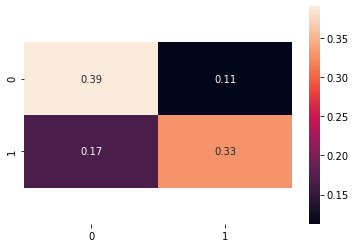

In [19]:
ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)

Los valores son mucho más aceptables, aunque sigue teniendo un porcentaje de error considerable.

**SVC**

In [12]:
from sklearn.svm import SVC

In [52]:
svc=SVC()
svc.fit(X_train, y_train)

y_predsvc=svc.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score as acc

acc(y_test, y_pred)

0.7180536275297728

In [23]:
cm(y_test, y_predsvc)

array([[5556, 1334],
       [2525, 4272]])

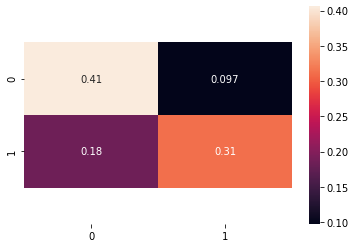

In [25]:
ax=sns.heatmap(cm(y_test, y_predsvc)/sum(sum(cm(y_test, y_predsvc))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5);

**RFC**

In [26]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [27]:
rfc=RFC()

rfc.fit(X_train, y_train)

y_pred_rfc=rfc.predict(X_test)

In [28]:
acc(y_test, y_pred_rfc)

0.7048294001607365

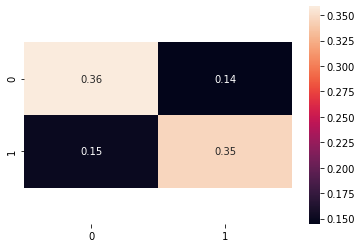

In [29]:
ax=sns.heatmap(cm(y_test, y_pred_rfc)/sum(sum(cm(y_test, y_pred_rfc))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5);

In [30]:
train_scorer=rfc.score(X_train, y_train)   # R2
test_scorer=rfc.score(X_test, y_test)

print (train_scorer, test_scorer)

0.9763079058892299 0.7048294001607365


In [31]:
RFC()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
from sklearn.model_selection import GridSearchCV

In [39]:
param={'max_leaf_nodes':[20,30,40,50,70,90], 'n_estimators':[5,10,15,20,25]}
grid = GridSearchCV(rfc,param)
grid.fit(X_train, y_train)
grid.best_params_

{'max_leaf_nodes': 90, 'n_estimators': 20}

In [35]:
rfc2=RFC(max_leaf_nodes=20,n_estimators=10)

rfc2.fit(X_train, y_train)

y_pred_rfc2=rfc2.predict(X_test)
acc(y_test, y_pred_rfc2)

0.7243369620808066

In [36]:
train_scorer2=rfc2.score(X_train, y_train)   # R2
test_scorer2=rfc2.score(X_test, y_test)

print (train_scorer2, test_scorer2)

0.7307650153441473 0.7243369620808066


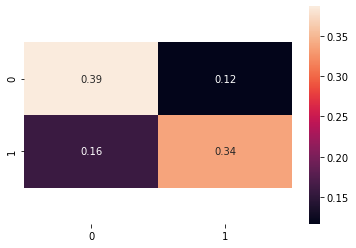

In [38]:
ax=sns.heatmap(cm(y_test, y_pred_rfc2)/sum(sum(cm(y_test, y_pred_rfc2))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5);

In [42]:
rfc3=RFC(max_leaf_nodes=90,n_estimators=20)

rfc3.fit(X_train, y_train)

y_pred_rfc3=rfc3.predict(X_test)
acc(y_test, y_pred_rfc3)

0.728866807919924

In [43]:
train_scorer3=rfc3.score(X_train, y_train)   # R2
test_scorer3=rfc3.score(X_test, y_test)

print (train_scorer3, test_scorer3)

0.740245506356861 0.728866807919924


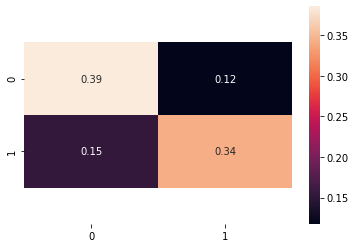

In [44]:
ax=sns.heatmap(cm(y_test, y_pred_rfc3)/sum(sum(cm(y_test, y_pred_rfc3))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5);

In [18]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score


In [47]:
precision_score(y_test, y_pred_rfc3)

0.7447652284263959

In [48]:
f1_score(y_test,y_pred)

0.688865597032976

Comparar precision de los modelos de RFC y SVC 

In [58]:
print("Modelo SVC: precision={}".format(precision_score(y_test, y_predsvc)))

Modelo SVC: precision=0.7620406707099536


In [59]:
print("Modelo RFC2: precision={}".format(precision_score(y_test, y_pred_rfc2)))

Modelo RFC2: precision=0.7515201314708299


In [60]:
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,IMC
0,50,2,168,62.0,110,80,1,1,0,0,1,21.97
1,55,1,156,85.0,140,90,3,1,0,0,1,34.93
2,52,1,165,64.0,130,70,3,1,0,0,0,23.51
3,48,2,169,82.0,150,100,1,1,0,0,1,28.71
4,48,1,156,56.0,100,60,1,1,0,0,0,23.01


In [22]:
xsample=X.loc[[1]]
xsample

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,IMC
1,55,1,156,85.0,140,90,3,1,0,0,1,34.93


In [79]:
svc.predict(xsample)

array([0])

In [25]:
xsample2=[[50,2,168,62,110,80,1,1,0,0,1,21.97]]

In [86]:
svc.predict(xsample2)

array([0])

In [89]:
cm(y_test, y_predsvc)

array([[5556, 1334],
       [2525, 4272]])

In [1]:
import pickle

In [91]:
#with open('Datos/modelo_svc.sav', 'wb') as f:
    #pickle.dump(svc, f)

In [13]:
svc2=SVC(probability=True)
svc2.fit(X_train, y_train)

y_predsvc2=svc2.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score as acc

acc(y_test,y_predsvc2)

0.7241908380214802

In [15]:
cm(y_test, y_predsvc2)

array([[5592, 1290],
       [2485, 4320]])

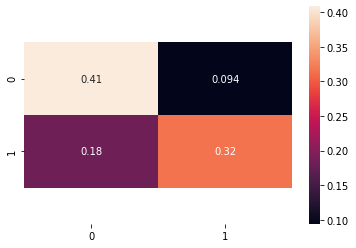

In [16]:
ax=sns.heatmap(cm(y_test, y_predsvc2)/sum(sum(cm(y_test, y_predsvc2))), annot=True)

b, t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5);

In [19]:
precision_score(y_test, y_predsvc2)

0.7700534759358288

In [23]:
svc2.predict(xsample)

array([1])

In [24]:
svc2.predict_proba(xsample)

array([[0.18766553, 0.81233447]])

In [26]:
svc2.predict(xsample2)

array([0])

In [27]:
svc2.predict_proba(xsample2)

array([[0.8330898, 0.1669102]])

In [29]:
with open('Datos/modelo_prob.sav', 'wb') as f:
    pickle.dump(svc2, f)